# Air Line Price Prediction (Hriday Mistry)

# Importing the usefull libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

# Importing dataset for training

In [4]:
train_df = pd.read_excel('Data_Train.xlsx')

In [5]:
train_df.shape

(10683, 11)

In [6]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Data cleaning

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_df[train_df.isna().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [10]:
train_df.dropna(inplace=True)

In [11]:
train_df.shape

(10682, 11)

# CHANGING OBJECT TYPE TO DATE TIME

In [12]:
data = train_df.copy()

In [13]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [14]:
def change_to_date(col):
    data[col] = pd.to_datetime(data[col])

In [15]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [16]:
for cols in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_to_date(cols)

In [17]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [18]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-10-02 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-02 05:50:00,2023-10-02 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-02 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-10-02 18:05:00,2023-10-02 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-10-02 16:50:00,2023-10-02 21:35:00,4h 45m,1 stop,No info,13302


In [19]:
data["Journey_day"] = data['Date_of_Journey'].dt.day
data["Journey_month"] = data['Date_of_Journey'].dt.month
data["Journey_year"] = data['Date_of_Journey'].dt.year

In [20]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-10-02 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-02 05:50:00,2023-10-02 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-02 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-10-02 18:05:00,2023-10-02 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-10-02 16:50:00,2023-10-02 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [21]:
def clean_time(col):
    data[col+'_hour'] = data[col].dt.hour
    data[col+'_min'] = data[col].dt.minute

In [22]:
for i in ['Dep_Time', 'Arrival_Time']:
    clean_time(i)

In [23]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-10-02 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-02 05:50:00,2023-10-02 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-02 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-10-02 18:05:00,2023-10-02 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-10-02 16:50:00,2023-10-02 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [24]:
data.drop(['Dep_Time', 'Arrival_Time'],axis=1,inplace=True)

In [25]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


# Exploratory Data Analysis

In [26]:
def flight_dep_time(x):

    if (x>4) and (x<=8):
        return "Early Morning"
    
    elif (x>8) and (x<=12):
        return "Morning"

    elif (x>12) and (x<=16):
        return "Noon"

    elif (x>16) and (x<=20):
        return "Evening"

    elif (x>20) and (x<=24):
        return "Night"
    
    else:
        return "late night"

<AxesSubplot:>

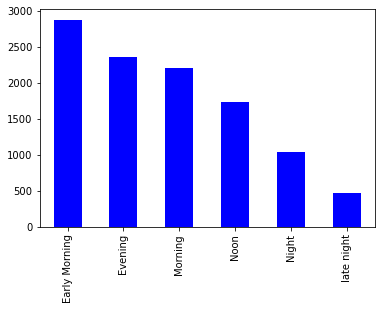

In [27]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar" , color="b")

In [28]:
#!pip install cufflinks

In [29]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot , iplot , init_notebook_mode , download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [30]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind="bar")

# preprocessing

In [31]:
def duration_process(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'

    return x 

In [32]:
data['Duration'] = data['Duration'].apply(duration_process)

In [33]:
data['Duration_hours'] = data['Duration'].apply(lambda x: x.split(' ')[0][0:-1])
data['Duration_min'] = data['Duration'].apply(lambda x: x.split(' ')[1][0:-1])

In [34]:
data['Duration_total_mins'] = data['Duration'].str.replace('h' ,"*60").str.replace(' ' , '+').str.replace('m' , "*1").apply(eval)

<AxesSubplot:xlabel='Duration_total_mins', ylabel='Price'>

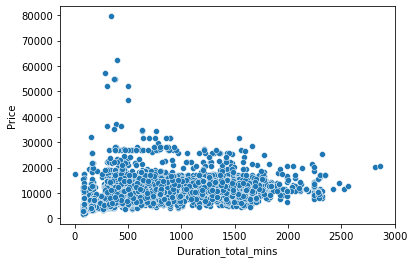

In [35]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , data=data)

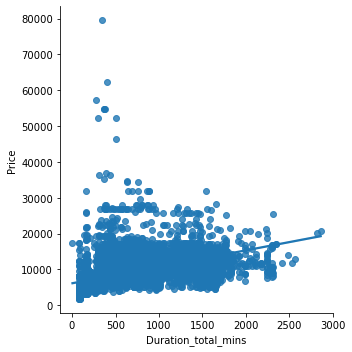

In [36]:
sns.lmplot(x="Duration_total_mins" , y="Price" , data=data)

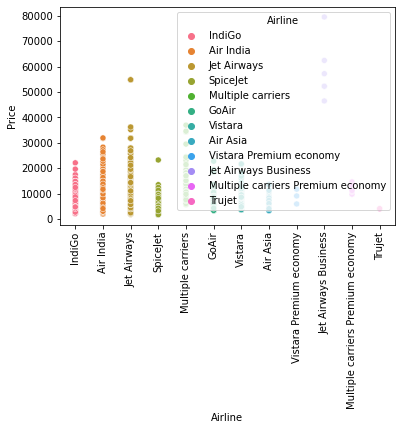

In [37]:
sns.scatterplot(x="Airline" , y="Price" , hue="Airline", data=data)
plt.xticks(rotation="vertical")
plt.show()

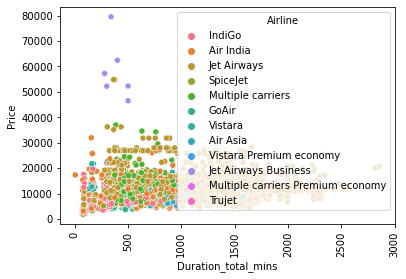

In [38]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , hue="Airline", data=data)
plt.xticks(rotation="vertical")
plt.show()

<AxesSubplot:xlabel='Duration_total_mins', ylabel='Price'>

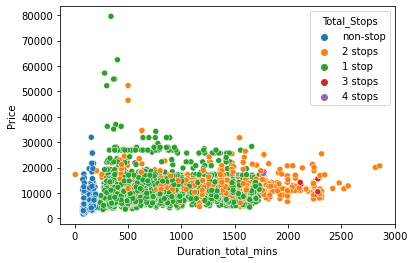

In [39]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , hue="Total_Stops", data=data)

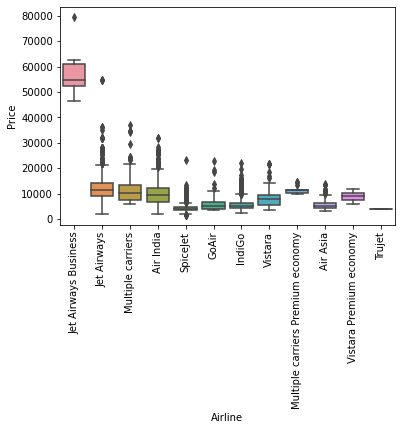

In [40]:
sns.boxplot(y='Price' , x='Airline' , data=data.sort_values('Price' , ascending=False))
plt.xticks(rotation="vertical")
plt.show()

# Pre - Processing for model building

# categorical changes to values

In [41]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_min,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45,285


In [42]:
data.nunique()

Airline                  12
Date_of_Journey          40
Source                    5
Destination               6
Route                   128
Duration                368
Total_Stops               5
Additional_Info          10
Price                  1870
Journey_day               9
Journey_month             7
Journey_year              1
Dep_Time_hour            24
Dep_Time_min             12
Arrival_Time_hour        24
Arrival_Time_min         12
Duration_hours           44
Duration_min             12
Duration_total_mins     368
dtype: int64

In [43]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [44]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [45]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x : 1 if x==sub_category else 0)

In [46]:
data.drop(['Date_of_Journey','Source','Duration'],axis = 1,inplace = True)

In [47]:
data['Duration_hours'] = data['Duration_hours'].astype('int64')

In [48]:
data['Duration_min'] = data['Duration_min'].astype('int64')

In [49]:
data.dtypes

Airline                object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Journey_year            int64
Dep_Time_hour           int64
Dep_Time_min            int64
Arrival_Time_hour       int64
Arrival_Time_min        int64
Duration_hours          int64
Duration_min            int64
Duration_total_mins     int64
Source_Banglore         int64
Source_Kolkata          int64
Source_Delhi            int64
Source_Chennai          int64
Source_Mumbai           int64
dtype: object

In [50]:
data.nunique()

Airline                  12
Destination               6
Route                   128
Total_Stops               5
Additional_Info          10
Price                  1870
Journey_day               9
Journey_month             7
Journey_year              1
Dep_Time_hour            24
Dep_Time_min             12
Arrival_Time_hour        24
Arrival_Time_min         12
Duration_hours           44
Duration_min             12
Duration_total_mins     368
Source_Banglore           2
Source_Kolkata            2
Source_Delhi              2
Source_Chennai            2
Source_Mumbai             2
dtype: int64

In [51]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [52]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [53]:
dict_airlines = {key:index for index , key in enumerate(airlines , 0)}

In [54]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [55]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [56]:
destinations = data.groupby(['Destination'])['Price'].mean().sort_values().index
dict_destinations = {key:index for index , key in enumerate(destinations , 0)}
data['Destination'] = data['Destination'].map(dict_destinations)

In [57]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [58]:
data.head()

,Airline,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,...,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_min,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,5,BLR → DEL,0,No info,3897,24,3,2019,22,...,1,10,2,50,170,1,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,2,No info,7662,5,1,2019,5,...,13,15,7,25,445,0,1,0,0,0
2,10,4,DEL → LKO → BOM → COK,2,No info,13882,6,9,2019,9,...,4,25,19,0,1140,0,0,1,0,0
3,3,3,CCU → NAG → BLR,1,No info,6218,5,12,2019,18,...,23,30,5,25,325,0,1,0,0,0
4,3,5,BLR → NAG → DEL,1,No info,13302,3,1,2019,16,...,21,35,4,45,285,1,0,0,0,0


In [59]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Total_Stops', 'Additional_Info',
       'Price', 'Journey_day', 'Journey_month', 'Journey_year',
       'Dep_Time_hour', 'Dep_Time_min', 'Arrival_Time_hour',
       'Arrival_Time_min', 'Duration_hours', 'Duration_min',
       'Duration_total_mins', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [60]:
data.drop(['Route','Additional_Info','Duration_total_mins','Journey_year'],axis = 1,inplace = True)

In [61]:
data.head()

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,5,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,5,1,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


# Data Visualization and outliers removal

In [62]:
def plot(df, col):
    fig , (ax1 , ax2 , ax3) = plt.subplots(3,1)

    sns.distplot(df[col] , ax=ax1)
    sns.boxplot(df[col] , ax=ax2)
    sns.distplot(df[col] , ax=ax3 , kde=False)

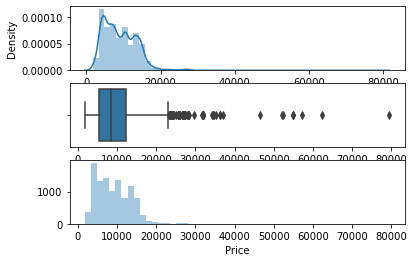

In [63]:
plot(data, 'Price')

In [64]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [65]:
minimum, maximum

(-5367.0, 23017.0)

In [66]:
len([price for price in data['Price'] if price> maximum or price<minimum])

94

# no need of outliers removal

In [67]:
x = data.drop(['Price'] , axis=1)

In [68]:
y = data['Price']

In [69]:
from sklearn.feature_selection import mutual_info_regression

In [70]:
imp_features = mutual_info_regression(x , y)

In [71]:
imp_features

array([0.97516027, 1.12250219, 0.78439787, 0.19139797, 0.23377291,
       0.33838825, 0.25461532, 0.4042517 , 0.35148468, 0.47484951,
       0.34495016, 0.39767333, 0.46531695, 0.51783256, 0.13635882,
       0.2044275 ])

In [72]:
imp_features_df = pd.DataFrame(imp_features , index=x.columns)

In [73]:
imp_features_df

,0
Airline,0.975160
Destination,1.122502
Total_Stops,0.784398
Journey_day,0.191398
Journey_month,0.233773
Dep_Time_hour,0.338388
Dep_Time_min,0.254615
Arrival_Time_hour,0.404252
Arrival_Time_min,0.351485
Duration_hours,0.474850


In [74]:
imp_features_df.columns = ['importance']

In [75]:
imp_features_df.sort_values(by = 'importance', ascending = False)

,importance
Destination,1.122502
Airline,0.975160
Total_Stops,0.784398
Source_Delhi,0.517833
Duration_hours,0.474850
Source_Kolkata,0.465317
Arrival_Time_hour,0.404252
Source_Banglore,0.397673
Arrival_Time_min,0.351485
Duration_min,0.344950


# MODEL BUILDING

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [77]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [78]:
y_pred = lr.predict(x_test)

In [79]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.571731893181183

In [80]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [81]:
y_pred_rfr = rfr.predict(x_test)

In [82]:
r2_score(y_test,y_pred_rfr)

0.7952444708303869

In [83]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [84]:
from xgboost import XGBRegressor
xgb_r = XGBRegressor()
xgb_r.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [85]:
y_pred_xgb = xgb_r.predict(x_test)

In [86]:
r2_score(y_test,y_pred_xgb)

0.8272855009498102